<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/edicoes_de_Processamento_de_Linguagem_Natural_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de linguagem natural com Python

## Importação das bibliotecas

In [ ]:
!pip install -q spacy==2.2.3 #Atualizado: 02/05/2021 Obs: utilizar esta versão.

     |████████████████████████████████| 10.4 MB 35.3 MB/s 
     |████████████████████████████████| 3.7 MB 63.1 MB/s 
     |████████████████████████████████| 2.2 MB 91.3 MB/s 
     |████████████████████████████████| 184 kB 80.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.0 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.2.3 which is incompatible.


In [45]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [2]:
!python3 -m spacy download pt

2024-01-01 19:20:54.893775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 19:20:54.893867: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 19:20:54.896086: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 19:20:57.088337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.2 MB/s eta 0:00:00
✔ Download and installation success

## Marcação POS

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [47]:
pln = spacy.load('pt_core_news_sm')
pln

In [48]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')

In [49]:
type(documento)

spacy.tokens.doc.Doc

In [50]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitiba PROPN


## Lematização e stemização

In [51]:
for token in documento:
  print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso curso
em em
Curitiba Curitiba


In [53]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar']

In [54]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [55]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [56]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso curso curs
em em em
Curitiba Curitiba curitib


## Carregamento dos textos

In [64]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Jap%C3%A3o')

In [ ]:
#'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'

In [ ]:
#dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Inteligência_artificial')

In [65]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Jap\xc3\xa3o \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-men

In [66]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Japão – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limit

In [67]:
paragrafos = dados_html.find_all('p')

In [68]:
len(paragrafos)

137

In [69]:
paragrafos[1]

<p><b>Japão</b> (em <a href="/wiki/L%C3%ADngua_japonesa" title="Língua japonesa">japonês</a>: <span lang="ja">日本</span>; <a href="/wiki/Romaniza%C3%A7%C3%A3o_(lingu%C3%ADstica)" title="Romanização (linguística)">romaniz.</a>:<span class="Unicode" lang="ja-Latn" style="white-space:normal; text-decoration: none" title="ISO 3602 Japanese"><i>Nihon</i> ou <i>Nippon</i></span>; oficialmente <span lang="ja">日本国</span>, <span class="unicode haudio"><span class="fn"><span style="white-space:nowrap;margin-right:.25em;"><span typeof="mw:File"><a href="/wiki/Ficheiro:Ja-nippon_nihonkoku.ogg" title="Sobre este som"><img alt="Sobre este som" class="mw-file-element" data-file-height="20" data-file-width="20" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Loudspeaker.svg/11px-Loudspeaker.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Loudspeaker.svg/17px-Loudspeaker.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Loudspeak

In [70]:
paragrafos[1].text

'Japão (em japonês: 日本; romaniz.:Nihon ou Nippon; oficialmente 日本国, Nippon-koku?·info ou koku, tradução literal: Estado do Japão) é um país insular da Ásia Oriental. Localizado no Oceano Pacífico, a leste do Mar do Japão, da República Popular da China, da Coreia do Norte, da Coreia do Sul e da Rússia, estendendo-se do Mar de Okhotsk, no norte, ao Mar da China Oriental e Taiwan, ao sul. Os caracteres que compõem seu nome significam "Origem do Sol", razão pela qual o Japão é às vezes identificado como a "Terra do Sol Nascente".\n'

In [71]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [72]:
conteudo

'Coordenadas: 35° 9\' 22" N 136° 3\' 36" EJapão (em japonês: 日本; romaniz.:Nihon ou Nippon; oficialmente 日本国, Nippon-koku?·info ou koku, tradução literal: Estado do Japão) é um país insular da Ásia Oriental. Localizado no Oceano Pacífico, a leste do Mar do Japão, da República Popular da China, da Coreia do Norte, da Coreia do Sul e da Rússia, estendendo-se do Mar de Okhotsk, no norte, ao Mar da China Oriental e Taiwan, ao sul. Os caracteres que compõem seu nome significam "Origem do Sol", razão pela qual o Japão é às vezes identificado como a "Terra do Sol Nascente".\nO país é um arquipélago de 6\xa0852 ilhas,[9] cujas quatro maiores são Honshu, Hokkaido, Kyushu e Shikoku, representando em conjunto 97% da área terrestre nacional. A maior parte das ilhas é montanhosa, com muitos vulcões, como, por exemplo, os Alpes japoneses e o Monte Fuji. O Japão possui a décima primeira maior população do mundo, com cerca de 125,4 milhões de habitantes.[10] A Região Metropolitana de Tóquio, que inclui

In [73]:
conteudo = conteudo.lower()
conteudo

'coordenadas: 35° 9\' 22" n 136° 3\' 36" ejapão (em japonês: 日本; romaniz.:nihon ou nippon; oficialmente 日本国, nippon-koku?·info ou koku, tradução literal: estado do japão) é um país insular da ásia oriental. localizado no oceano pacífico, a leste do mar do japão, da república popular da china, da coreia do norte, da coreia do sul e da rússia, estendendo-se do mar de okhotsk, no norte, ao mar da china oriental e taiwan, ao sul. os caracteres que compõem seu nome significam "origem do sol", razão pela qual o japão é às vezes identificado como a "terra do sol nascente".\no país é um arquipélago de 6\xa0852 ilhas,[9] cujas quatro maiores são honshu, hokkaido, kyushu e shikoku, representando em conjunto 97% da área terrestre nacional. a maior parte das ilhas é montanhosa, com muitos vulcões, como, por exemplo, os alpes japoneses e o monte fuji. o japão possui a décima primeira maior população do mundo, com cerca de 125,4 milhões de habitantes.[10] a região metropolitana de tóquio, que inclui

## Buscas em textos com spaCy

In [74]:
pln = spacy.load('pt_core_news_sm')
pln

In [76]:
string = 'japão'
token_pesquisa = pln(string)

In [77]:
pln.vocab

In [78]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [79]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 38, 39),
 (8661325627334373315, 58, 59),
 (8661325627334373315, 116, 117),
 (8661325627334373315, 190, 191),
 (8661325627334373315, 264, 265),
 (8661325627334373315, 306, 307),
 (8661325627334373315, 398, 399),
 (8661325627334373315, 467, 468),
 (8661325627334373315, 614, 615),
 (8661325627334373315, 629, 630),
 (8661325627334373315, 660, 661),
 (8661325627334373315, 683, 684),
 (8661325627334373315, 772, 773),
 (8661325627334373315, 830, 831),
 (8661325627334373315, 912, 913),
 (8661325627334373315, 924, 925),
 (8661325627334373315, 946, 947),
 (8661325627334373315, 1032, 1033),
 (8661325627334373315, 1526, 1527),
 (8661325627334373315, 1544, 1545),
 (8661325627334373315, 1584, 1585),
 (8661325627334373315, 1603, 1604),
 (8661325627334373315, 1611, 1612),
 (8661325627334373315, 1857, 1858),
 (8661325627334373315, 1917, 1918),
 (8661325627334373315, 1978, 1979),
 (8661325627334373315, 1997, 1998),
 (8661325627334373315, 2021, 2022),
 (8661325627334373315, 2048, 2

In [80]:
doc[2323:2324], doc[2323-5:2324+5]

(líderes, 1946) para processar alguns líderes japoneses por crimes de guerra)

In [81]:
doc[2333:2334], doc[2333-5:2334+5]

(todos, guerra. no entanto, todos os membros das unidades de)

In [82]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 38, 39), 38, 39)

In [83]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [84]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

estado do japão LOC
ásia oriental LOC
oceano pacífico LOC
mar do japão LOC
república popular da china LOC
coreia do norte LOC
coreia do sul LOC
rússia LOC
mar de okhotsk LOC
mar da china oriental LOC
taiwan LOC
japão LOC
hokkaido LOC
kyushu LOC
alpes japoneses LOC
monte fuji LOC
japão LOC
região metropolitana de tóquio LOC
tóquio LOC
do japão LOC
século i d.c PER
japão LOC
g7.[13 ORG
paz.[14 PER
japão LOC
onu ORG
oms ORG
união europeia ORG
japão LOC
nihon PER
にほん ORG
nihon? MISC
nihon PER
nihonjin LOC
日本人 MISC
nihonjin? MISC
日本語 PER
nihon PER
do japão LOC
china LOC
japão LOC
japão LOC
marco polo PER
japão LOC
japão LOC
jepang LOC
malásia LOC
jepang LOC
indonésia LOC
do japão LOC
japão LOC
japão LOC
jomon,[21][22 ORG
do japão LOC
japão LOC
kōtoku PER
dinastia tang PER
china LOC
asuka LOC
nara LOC
imperador kammu PER
corte.[21][22 MISC
kamakura LOC
heian PER
daimiôs PER
heian PER
daimiôs PER
guerra de ōnin MISC
daimiôs MISC
japão LOC
japão LOC
companhia de jesus ORG
japão LOC
japão LOC
j

In [85]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de palavras e stop words

In [86]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'tentaram', 'baixo', 'além', 'aquela', 'bem', 'contudo', 'faz', 'do', 'nossas', 'te', 'atrás', 'somos', 'bastante', 'ademais', 'a', 'alguns', 'fazemos', 'teus', 'pouca', 'meio', 'quinto', 'por', 'ela', 'tudo', 'usa', 'logo', 'eventual', 'essa', 'teu', 'vinda', 'terceira', 'são', 'primeira', 'através', 'qual', 'ver', 'pode', 'ir', 'quando', 'debaixo', 'deste', 'naquela', 'primeiro', 'somente', 'põem', 'três', 'segunda', 'cujo', 'apoia', 'em', 'seria', 'isso', 'vens', 'iniciar', 'dá', 'novas', 'já', 'antes', 'boa', 'umas', 'geral', 'exemplo', 'des', 'quero', 'sim', 'mal', 'possível', 'vindo', 'vêm', 'corrente', 'vossas', 'desde', 'aos', 'nova', 'fostes', 'número', 'números', 'tais', 'estivestes', 'vão', 'esse', 'puderam', 'assim', 'parte', 'bom', 'dezanove', 'quer', 'porquanto', 'até', 'nove', 'apontar', 'sua', 'era', 'tu', 'aí', 'cuja', 'ali', 'porque', 'contra', 'oitava', 'diante', 'nesta', 'vez', 'sétimo', 'temos', 'após', 'minha', 'forma', 'grande', 'meu', 'comprido', 'todos', 'as',

In [87]:
len(STOP_WORDS)

416

In [88]:
pln.vocab['usa'].is_stop

True

In [89]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [90]:
print(lista_token)

['coordenadas', ':', '35', '°', '9', "'", '22', '"', 'n', '136', '°', '3', "'", '36', '"', 'ejapão', '(', 'em', 'japonês', ':', '日本', ';', 'romaniz.:nihon', 'ou', 'nippon', ';', 'oficialmente', '日本国', ',', 'nippon-koku?·info', 'ou', 'koku', ',', 'tradução', 'literal', ':', 'estado', 'do', 'japão', ')', 'é', 'um', 'país', 'insular', 'da', 'ásia', 'oriental', '.', 'localizado', 'no', 'oceano', 'pacífico', ',', 'a', 'leste', 'do', 'mar', 'do', 'japão', ',', 'da', 'república', 'popular', 'da', 'china', ',', 'da', 'coreia', 'do', 'norte', ',', 'da', 'coreia', 'do', 'sul', 'e', 'da', 'rússia', ',', 'estendendo-se', 'do', 'mar', 'de', 'okhotsk', ',', 'no', 'norte', ',', 'ao', 'mar', 'da', 'china', 'oriental', 'e', 'taiwan', ',', 'ao', 'sul', '.', 'os', 'caracteres', 'que', 'compõem', 'seu', 'nome', 'significam', '"', 'origem', 'do', 'sol', '"', ',', 'razão', 'pela', 'qual', 'o', 'japão', 'é', 'às', 'vezes', 'identificado', 'como', 'a', '"', 'terra', 'do', 'sol', 'nascente', '"', '.', '\n', 'o

In [91]:
len(lista_token)

12242

In [92]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [93]:
print(sem_stop)

['coordenadas', ':', '35', '°', '9', "'", '22', '"', 'n', '136', '°', '3', "'", '36', '"', 'ejapão', '(', 'japonês', ':', '日本', ';', 'romaniz.:nihon', 'nippon', ';', 'oficialmente', '日本国', ',', 'nippon-koku?·info', 'koku', ',', 'tradução', 'literal', ':', 'japão', ')', 'país', 'insular', 'ásia', 'oriental', '.', 'localizado', 'oceano', 'pacífico', ',', 'leste', 'mar', 'japão', ',', 'república', 'popular', 'china', ',', 'coreia', 'norte', ',', 'coreia', 'sul', 'rússia', ',', 'estendendo-se', 'mar', 'okhotsk', ',', 'norte', ',', 'mar', 'china', 'oriental', 'taiwan', ',', 'sul', '.', 'caracteres', 'compõem', 'nome', 'significam', '"', 'origem', 'sol', '"', ',', 'razão', 'japão', 'identificado', '"', 'terra', 'sol', 'nascente', '"', '.', '\n', 'país', 'arquipélago', '6', '\xa0', '852', 'ilhas,[9', ']', 'cujas', 'maiores', 'honshu', ',', 'hokkaido', ',', 'kyushu', 'shikoku', ',', 'representando', 'conjunto', '97', '%', 'terrestre', 'nacional', '.', 'ilhas', 'montanhosa', ',', 'vulcões', ','

In [94]:
len(sem_stop)

7240

In [95]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [96]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

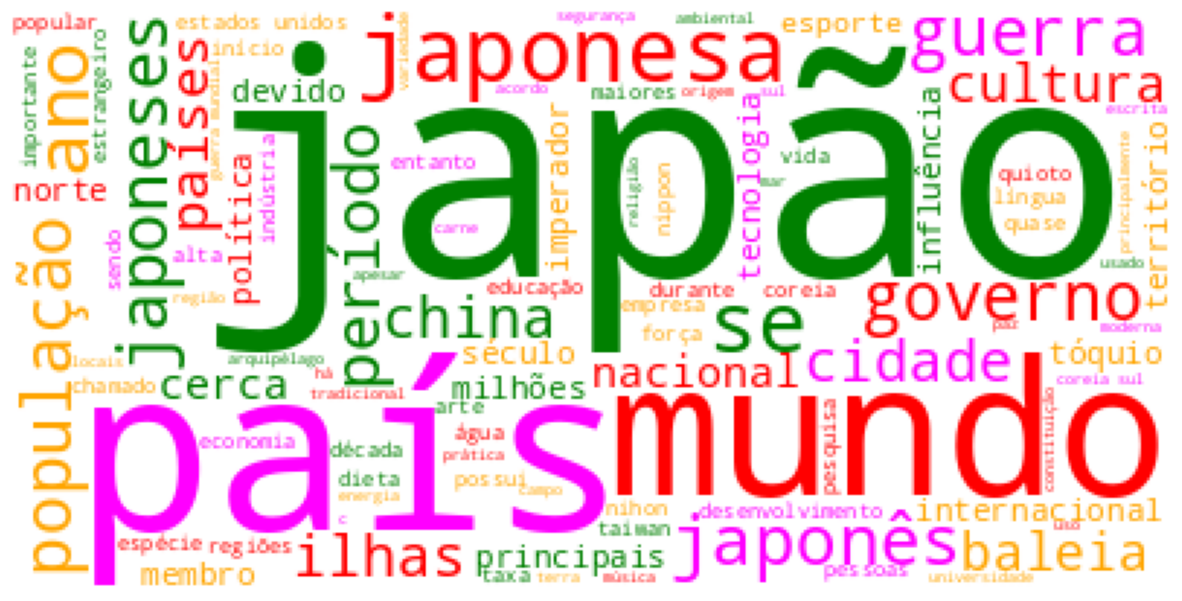

In [97]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()